In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv("D:\\MAIN FLOW Internship\\task-6\\rainfall.csv")

In [3]:
# check first few rows
df.head()

,date,rainfall
0,2022-01-01,12.5
1,2022-01-02,8.2
2,2022-01-03,0.0
3,2022-01-04,3.7
4,2022-01-05,21.1


In [4]:
#  check last few rows
df.tail()

,date,rainfall
114,2022-04-25,22.3
115,2022-04-26,13.1
116,2022-04-27,0.0
117,2022-04-28,2.9
118,2022-04-29,10.2


In [5]:
# name all columns
df.columns.values

array(['date', 'rainfall'], dtype=object)

In [6]:
# check for null values
df.isna().sum()

date        0
rainfall    0
dtype: int64

In [7]:
# consise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      119 non-null    object 
 1   rainfall  119 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [8]:
# descriptive statics
df.describe()

,rainfall
count,119.000000
mean,9.484034
std,6.860992
min,0.000000
25%,4.050000
50%,9.500000
75%,14.850000
max,22.400000


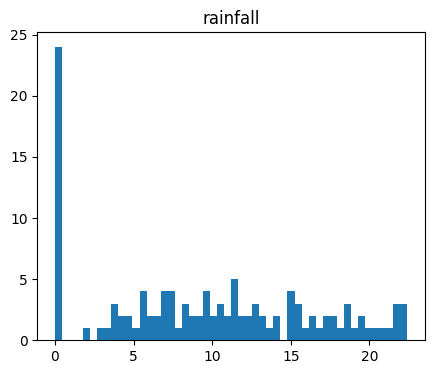

In [9]:
# lets plot some graph for visualization for solving question

#plotting histogram of all numeric values
df.hist(bins=50, grid=False, figsize=(5,4));

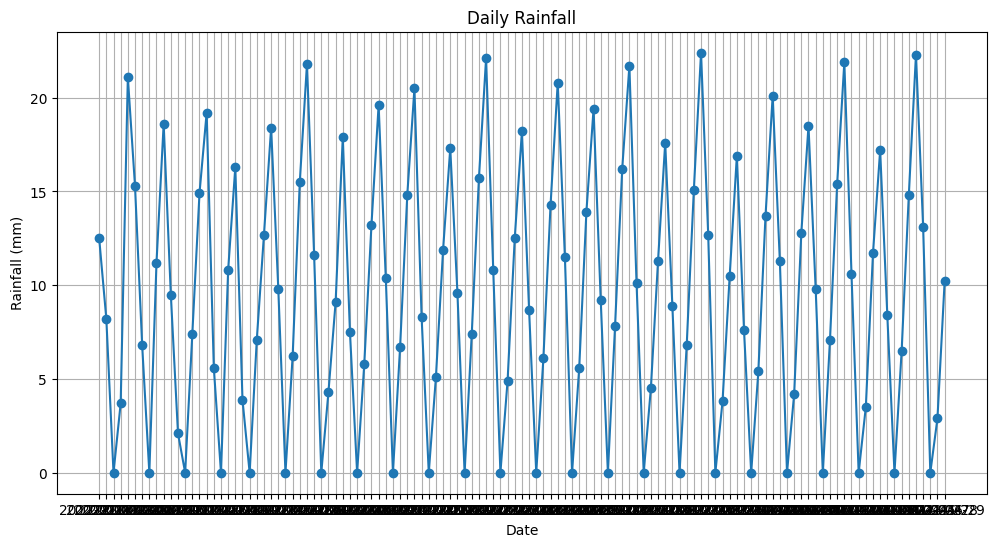

In [10]:
# Line Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['rainfall'], marker='o')
plt.title('Daily Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

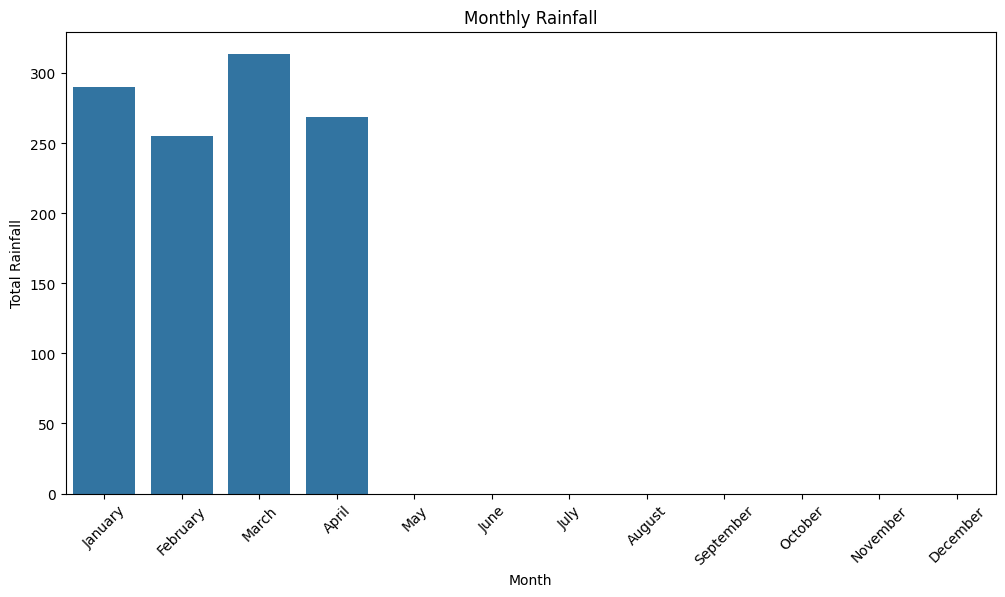

In [11]:
# Bar Plot
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract month name
df['month'] = df['date'].dt.strftime('%B')

# Group by month and sum the rainfall
monthly_rainfall = df.groupby('month')['rainfall'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values)
plt.title('Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Total Rainfall')
plt.xticks(rotation=45)
plt.show()


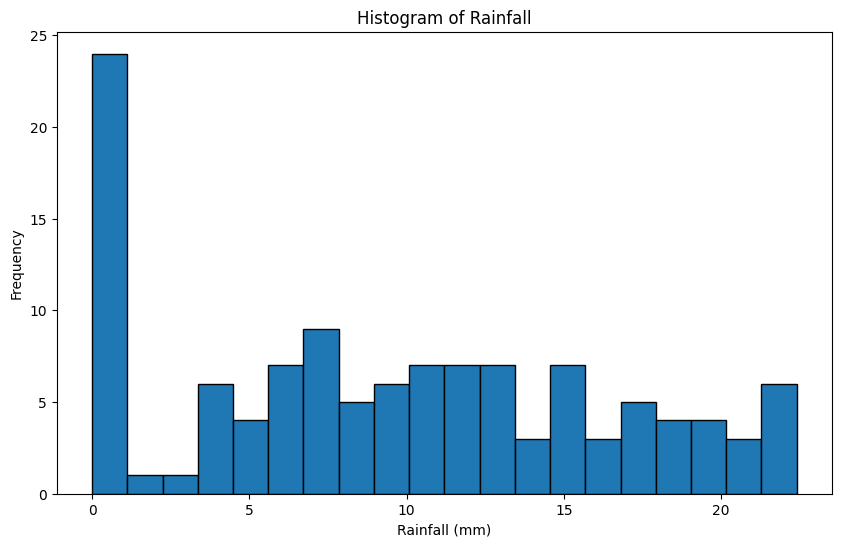

In [12]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['rainfall'], bins=20, edgecolor='k')
plt.title('Histogram of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()


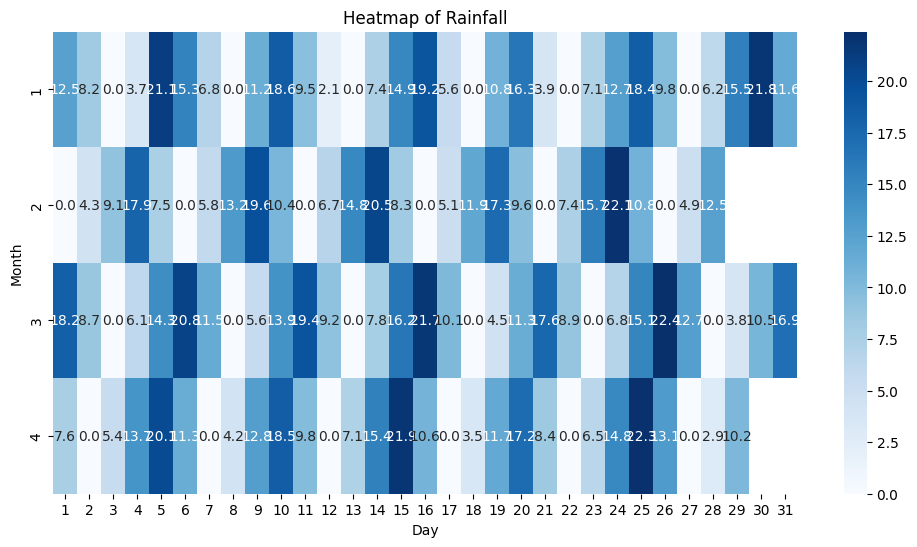

In [13]:
# Heatmap of Rainfall
rainfall_matrix = df.pivot_table(index=df['date'].dt.month, columns=df['date'].dt.day, values='rainfall')
plt.figure(figsize=(12, 6))
sns.heatmap(rainfall_matrix, cmap='Blues', annot=True, fmt=".1f")
plt.title('Heatmap of Rainfall')
plt.xlabel('Day')
plt.ylabel('Month')
plt.show()

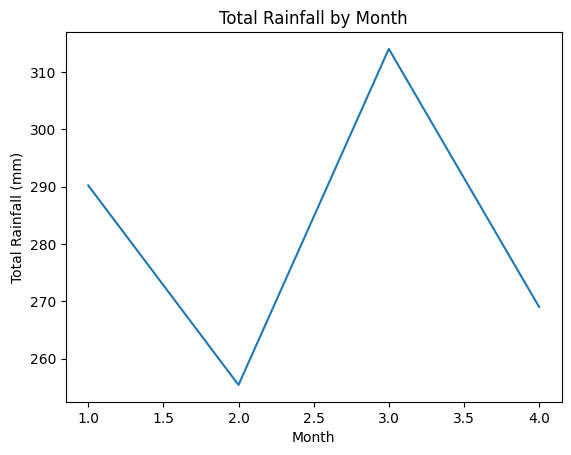

In [14]:
# Line Plot 
total_rainfall_by_month = df.groupby(df['date'].dt.month)['rainfall'].sum()
total_rainfall_by_month.plot(kind='line')
plt.title('Total Rainfall by Month')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.show()

In [15]:
# Q1. What is the total rainfall in January 2022?

january_rainfall = df[df['date'].dt.month == 1]['rainfall'].sum()
print(january_rainfall)

290.20000000000005


In [16]:
# 290.2 is the solution

# Q2. Which month has the highest average rainfall?

average_rainfall_by_month = df.groupby(df['date'].dt.month)['rainfall'].mean()
print(average_rainfall_by_month.idxmax())

3


In [17]:
# here it is showing '3' which means 'March' is the month in 2022 to have highest avg rainfall

# Q3. What is the longest streak of days with no rainfall?

streaks = []
current_streak = 0

for i in range(len(df)):
    if df.iloc[i]['rainfall'] == 0:
        current_streak += 1
    else:
        streaks.append(current_streak)
        current_streak = 0

print(max(streaks))

1


In [18]:
# this shows that that there is no continuous days where has stopped for as max streaks is '1'

# Q4. What is the average rainfall on weekends (Saturdays and Sundays)?

weekend_rainfall = df[df['date'].dt.dayofweek.isin([5, 6])]['rainfall'].mean()
print(weekend_rainfall)

9.852941176470589


In [19]:
# avg rainfall on weekends is '9.85'

# Q5. Which day of the week has the highest average rainfall?

average_rainfall_by_day_of_week = df.groupby(df['date'].dt.dayofweek)['rainfall'].mean()
print(average_rainfall_by_day_of_week.idxmax())

6


In [20]:
# since it shows '6' it means its 'Saturday' if we take 'Sunday' as the first day of week.

# Q6. What is the total rainfall in the first half of the year (January to June)?

first_half_rainfall = df[df['date'].dt.month.isin([1, 2, 3, 4])]['rainfall'].sum()
print(first_half_rainfall)

1128.6


In [21]:
# it is '1128.6 mm' of rainfall till april as the data is given only till april

# Q7. What is the average rainfall in the second half of each month?

second_half_rainfall = df[df['date'].dt.day >= 15]['rainfall'].mean()
print(second_half_rainfall)

9.857142857142858


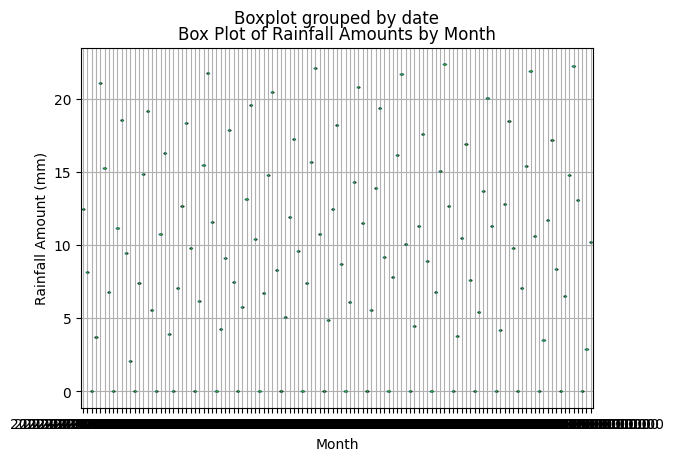

In [22]:
# avg rainfall in second of each month is '9.86 mm'.

# lets see more of the visual graph.

# Box Plot
df.boxplot(column='rainfall', by='date')
plt.title('Box Plot of Rainfall Amounts by Month')
plt.xlabel('Month')
plt.ylabel('Rainfall Amount (mm)')
plt.show()

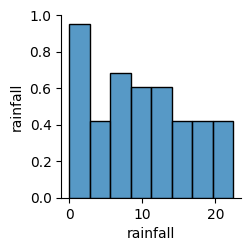

In [23]:
# Pair Plot of Rainfall Data
sns.pairplot(df[['rainfall']])
plt.show()

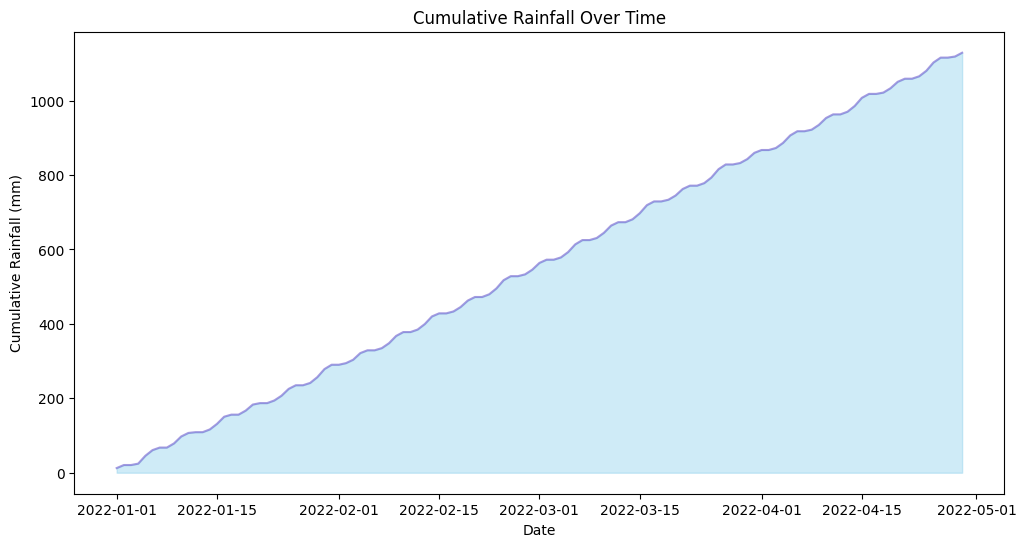

In [24]:
# Area Plot of Cumulative Rainfall

df['cumulative_rainfall'] = df['rainfall'].cumsum()

plt.figure(figsize=(12, 6))
plt.fill_between(df['date'], df['cumulative_rainfall'], color='skyblue', alpha=0.4)
plt.plot(df['date'], df['cumulative_rainfall'], color='Slateblue', alpha=0.6)
plt.title('Cumulative Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Rainfall (mm)')
plt.show()

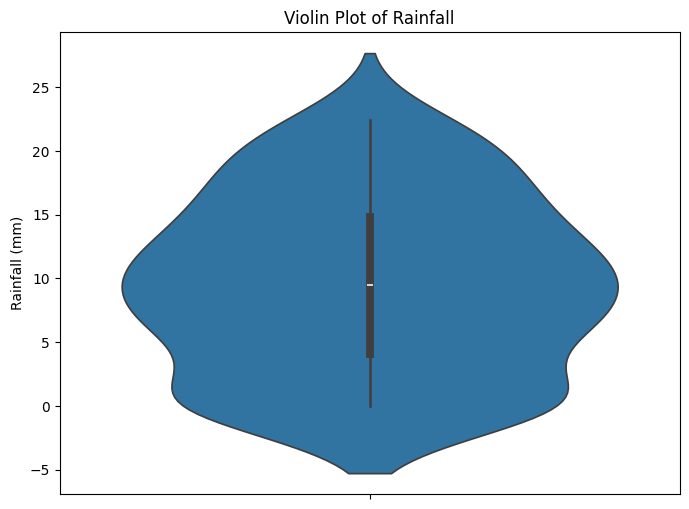

In [25]:
# Violin Plot of Rainfall
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['rainfall'])
plt.title('Violin Plot of Rainfall')
plt.ylabel('Rainfall (mm)')
plt.show()

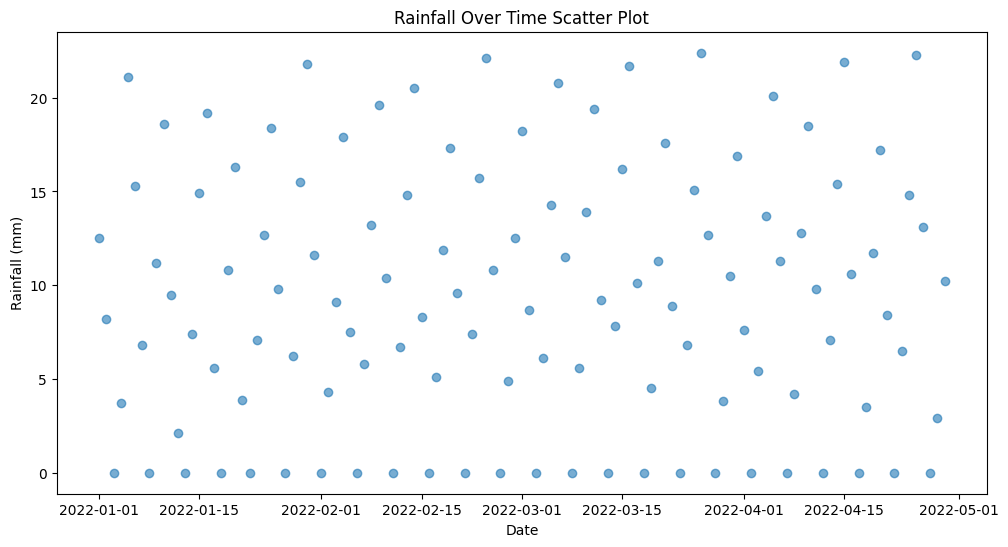

In [26]:
# Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['rainfall'], alpha=0.6)
plt.title('Rainfall Over Time Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.show()


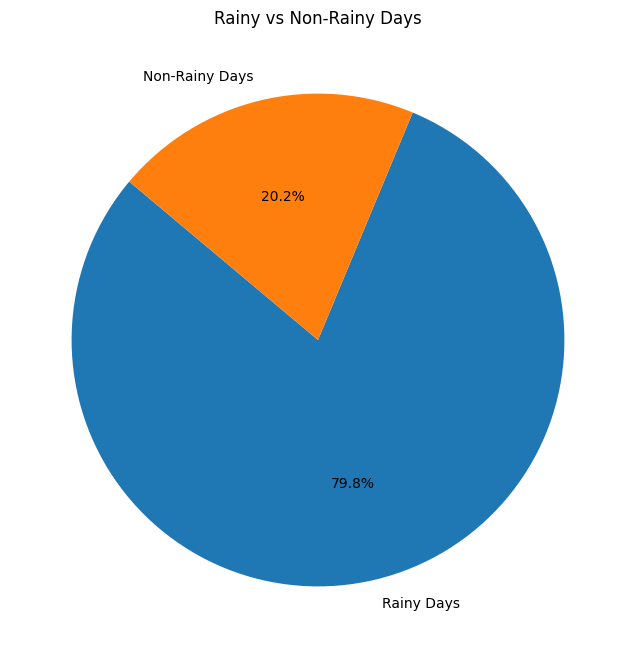

In [27]:
# Pie Chart of Rainy vs Non-Rainy Days
rainy_days = df[df['rainfall'] > 0].shape[0]
non_rainy_days = df[df['rainfall'] == 0].shape[0]

plt.figure(figsize=(8, 8))
plt.pie([rainy_days, non_rainy_days], labels=['Rainy Days', 'Non-Rainy Days'], autopct='%1.1f%%', startangle=140)
plt.title('Rainy vs Non-Rainy Days')
plt.show()

In [28]:
# Thankyou...